# Project 2 - Gain insight from an open-ended question

In [1]:
# import numpy and pandas before starting
import numpy as np
import pandas as pd

In [157]:
# to avoid warnings to make the document output more readable
# suppress all warnings by using the warnings module and using the function ‘filterwarnings()’.
import warnings
warnings.filterwarnings('ignore')

# 1. Preparing Data

## Excel operations

- convert all cells to lowercase
- delete records which has only: ".", "x" and "secret"
- standardize some words
    - **old**-->**new**
    - ar-ge-->arge
    - ar ge-->arge
    - know-how-->knowhow
    - covıd-->covid
    - covid-19-->covid19
    - covid 19-->covid19
    - sars-cov-2-->sarscov2
    - sars cov-2-->sarscov2
    - sarscov 2-->sarscov2
    - enter-->space
    - faz 3-->faz3
    - faz 2-->faz2
    - faz-2-->faz2
    - faz-3-->faz3
    - faz 1-->faz1

## If we want to do excel operations in python

In [9]:
# I, İ correction
# liste2 = [x.replace('I', 'ı') for x in liste1]
# convert all to lowercase
# liste = [x.lower() for x in liste2]

## Load the data

In [5]:
# Load the data from a .xlsx in the specified folder
df = pd.read_excel (r'C:\Users\bilal\Biyoteknoloji\Diger.xlsx',sheet_name='Aciklama')
# Let's check first 5 records 
df.head()

,BIYOTEK_FAAL_ACIKLAMA
0,"dna markörleri, primer tasarım, genomik düzeyd..."
1,hayvansal aşı üretimi
2,tohum ıslah çalışmalarında moleküler marker de...
3,sebze tohum üretiminde markör testlemeleri il...
4,mikrobiyal kaynaklı rdna teknolojisi ile hücre...


## Convert to a list

In [11]:
# convert df column into a list
liste = df['BIYOTEK_FAAL_ACIKLAMA'].tolist()
# Let's explore first 5 elements of the list
liste[0:4]

['dna markörleri, primer tasarım, genomik düzeyde filogenetik analiz, moleküler markör geliştirme, qtl analizi, snp analizi, bitkilerde görülen hastalıkların moleküler tespiti, klonlama, double-haploid bitki üretimi, mikroçoğaltım, doku kültürü teknikleri (anter, ovaryum kültürleri)',
 'hayvansal aşı üretimi',
 'tohum ıslah çalışmalarında moleküler marker destekli seleksiyon çalışması yapılıyor.',
 'sebze  tohum üretiminde markör testlemeleri ile biyoteknolojik çalışmalar yürütülmektedir.']

## Tokenization

Tokenization is a common task in Natural Language Processing (NLP). Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization. The most common way of forming tokens is based on space. 

The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language. 

Nltk word_tokenize is used to extract tokens from a string of characters using the word tokenize method. Return a tokenized version of the text using NLTK’s suggested wording. It is the process of breaking down a big amount of text into smaller pieces called tokens.

In [14]:
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
tokenized_sents = [word_tokenize(i) for i in liste]
# Let's check first 3 records 
tokenized_sents[0:2]

[['dna',
  'markörleri',
  ',',
  'primer',
  'tasarım',
  ',',
  'genomik',
  'düzeyde',
  'filogenetik',
  'analiz',
  ',',
  'moleküler',
  'markör',
  'geliştirme',
  ',',
  'qtl',
  'analizi',
  ',',
  'snp',
  'analizi',
  ',',
  'bitkilerde',
  'görülen',
  'hastalıkların',
  'moleküler',
  'tespiti',
  ',',
  'klonlama',
  ',',
  'double-haploid',
  'bitki',
  'üretimi',
  ',',
  'mikroçoğaltım',
  ',',
  'doku',
  'kültürü',
  'teknikleri',
  '(',
  'anter',
  ',',
  'ovaryum',
  'kültürleri',
  ')'],
 ['hayvansal', 'aşı', 'üretimi']]

**After tokenize, it gave the result as list of lists. whereas I only needed a list. Otherwise, the program throws an error afterwards.**

In [15]:
# Convert resulting list of lists to list
duz = []
for i in tokenized_sents:
    for j in i:
        duz.append(j)
# Let's check first 5 records 
duz[0:5]

['dna', 'markörleri', ',', 'primer', 'tasarım']

## Remove punctuations

### Detect punctuations

The _string_ module contains a number of functions to process standard Python strings

In [17]:
# to detect punctuations in the list
# import string library function 
import string 

punc=[]
for i in duz:
      
    # checking whether the char is punctuation.
    if i in string.punctuation:
        punc.append(i)

# no duplicate elements
punc = list(set(punc))
punc

["'", '%', ':', ';', '!', '.', ',', '*', '&', '-', '`', ')', '(']

### Remove detected punctuations

In [19]:
# to remove punctuations from the list
filtered_punctuation = []
  
for w in duz:
    if w not in punc:
        filtered_punctuation.append(w)
# Let's explore first 5 elements of the list
filtered_punctuation[0:5]

['dna', 'markörleri', 'primer', 'tasarım', 'genomik']

# 2. Collocations

Collocations are expressions of multiple words which commonly co-occur.

**nltk.collocations module**

Tools to identify collocations — words that often appear consecutively — within corpora. They may also be used to find other associations between word occurrences.

Finding collocations requires first calculating the frequencies of words and their appearance in the context of other words. Often the collection of words will then requiring filtering to only retain useful content terms. Each ngram of words may then be scored according to some association measure, in order to determine the relative likelihood of each ngram being a collocation.

The BigramCollocationFinder and TrigramCollocationFinder classes provide these functionalities, dependent on being provided a function which scores a ngram given appropriate frequency counts. A number of standard association measures are provided in bigram_measures and trigram_measures.

## PMI (bigram)

### The top ten bigram collocations, as measured using Pointwise Mutual Information (PMI)
https://en.wikipedia.org/wiki/Pointwise_mutual_information.

In [29]:
# nltk.download('genesis')
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()

# change this to read in your data
finder_2grams = BigramCollocationFinder.from_words(filtered_punctuation)

# return the 10 n-grams with the highest PMI
finder_2grams.nbest(bigram_measures.pmi, 10)

[("'düzen", 'laboratuvarlar'),
 ("'ların", 'tayinine'),
 ('-ekstraksiyon', 'zenginleştirme'),
 ('01.10.2020', 'tarihinde'),
 ('100', 'oranında'),
 ('14', 'gösterince'),
 ('16s', 'rrna'),
 ('17025', 'akreditasyon'),
 ('20', 'buzağı'),
 ('2016/14482', 'tescilli')]

While these words are highly collocated, the expressions are also very infrequent. Therefore it is useful to apply filters, such as ignoring all bigrams which occur less than ten times in the corpus:

In [30]:
# only bigrams that appear 10+ times
finder_2grams.apply_freq_filter(10)
finder_2grams.nbest(bigram_measures.pmi, 10)

[('devam', 'etmektedir'),
 ('nesil', 'dizileme'),
 ('yeni', 'nesil'),
 ('moleküler', 'biyoloji'),
 ('doku', 'kültürü'),
 ('hücre', 'kültürü'),
 ('tanı', 'kiti'),
 ('tanı', 'kitleri'),
 ('arge', 'çalışmaları'),
 ('ile', 'ilgili')]

<div class="alert alert-block alert-info">
<b>In English:</b> 

[('continues'),
    
  ('generation', 'sequencing'),
    
  ('Next generation'),
    
  ('molecular Biology'),
    
  ('tissue', 'culture'),
    
  ('cell culture'),
    
  ('diagnosis', 'kit'),
    
  ('diagnosis', 'kits'),
    
  ('r&d', 'works'),
    
  ('with', 'related')]
  </div>

## The Likelihood Ratio (bigram)

A number of measures are available to score collocations or other associations including bigram_measures.likelihood_ratio. I apply this measure below and show the top collocated tokens.

In [52]:
for i in finder_2grams.score_ngrams(bigram_measures.likelihood_ratio):
    print(i)

(('doku', 'kültürü'), 204.87504236004332)
(('yeni', 'nesil'), 159.51819483955012)
(('devam', 'etmektedir'), 146.71288923134472)
(('tanı', 'kiti'), 115.74382373477548)
(('nesil', 'dizileme'), 115.57157175260556)
(('arge', 'çalışmaları'), 102.5046112157779)
(('hücre', 'kültürü'), 100.56417830700879)
(('tanı', 'kitleri'), 100.47903604970529)
(('moleküler', 'biyoloji'), 99.6054717448332)
(('ile', 'ilgili'), 79.75959893053424)
(('geliştirilmesi', 've'), 24.38143722500414)
(('üretimi', 've'), 11.554412007354394)


<div class="alert alert-block alert-info">
<b>In English:</b>
    
('tissue', 'culture')
    
('next', 'generation')
    
('continues', 'continues')
    
('diagnosis', 'kit')
    
('generation', 'sequencing')
    
('r&d', 'works')
    
('cell', 'culture')
    
('diagnosis', 'kits')
    
('molecular', 'biology')
    
('with', 'related')
    
('develop', 'and')
    
('production', 'and')
</div>

## Raw Frequency (bigram)
https://nlp.stanford.edu/fsnlp/promo/colloc.pdf

In [55]:
# Returns a sequence of (ngram, score) pairs ordered from highest to lowest score,
# as determined by the scoring function provided.
scored = finder_2grams.score_ngrams(bigram_measures.raw_freq)
sorted(bigram for bigram, score in scored)

[('arge', 'çalışmaları'),
 ('devam', 'etmektedir'),
 ('doku', 'kültürü'),
 ('geliştirilmesi', 've'),
 ('hücre', 'kültürü'),
 ('ile', 'ilgili'),
 ('moleküler', 'biyoloji'),
 ('nesil', 'dizileme'),
 ('tanı', 'kiti'),
 ('tanı', 'kitleri'),
 ('yeni', 'nesil'),
 ('üretimi', 've')]

<div class="alert alert-block alert-info">
<b>In English:</b>
    
[('r&d', 'work'),
    
  ('continues'),
    
  ('tissue', 'culture'),
    
  ('develop', 'and'),
    
  ('cell culture'),
    
  ('with', 'related'),
    
  ('molecular Biology'),
    
  ('generation', 'sequencing'),
    
  ('diagnosis', 'kit'),
    
  ('diagnosis', 'kits'),
    
  ('Next generation'),
    
  ('production', 'and')]
  </div>

## PMI (trigram)

### The top ten trigram collocations, as measured using Pointwise Mutual Information (PMI)

In [69]:
# A similar interface is provided for trigrams:
finder_3grams = TrigramCollocationFinder.from_words(filtered_punctuation)

# only trigrams that appear 3+ times
finder_3grams.apply_freq_filter(3)

# return the 10 n-grams with the highest PMI
finder_3grams.nbest(trigram_measures.pmi, 10)

[('real', 'time', 'pcr'),
 ('takviye', 'edici', 'gıda'),
 ('katma', 'değeri', 'yüksek'),
 ('çalışmalarımız', 'devam', 'etmektedir'),
 ('yeni', 'nesil', 'dizileme'),
 ('bir', 'biyoteknoloji', 'firmasıdır'),
 ('tanı', 'kitlerinde', 'kullanılan'),
 ('mikrobiyal', 'gübre', 'üretimi'),
 ('tanı', 'kitlerinin', 'geliştirilmesi'),
 ('covid19', 'tanı', 'kiti')]

<div class="alert alert-block alert-info">
<b>In English:</b>

[('real', 'time', 'pcr'),
    
  ('supplement', 'reinforcing', 'food'),
    
  ('added', 'value', 'high'),
    
  ('our works', 'continued', 'in progress'),
    
  ('next', 'generation', 'sequencing'),
    
  ('a', 'biotechnology', 'company'),
    
  ('diagnosis', 'kits', 'used'),
    
  ('microbial', 'fertilizer', 'production'),
    
  ('diagnosis', 'kits', 'development'),
    
  ('covid19', 'diagnosis', 'kit')]
     </div>

## The Likelihood Ratio (trigram)

In [70]:
for i in finder_3grams.score_ngrams(trigram_measures.likelihood_ratio):
    print(i)

(('yeni', 'nesil', 'dizileme'), 412.6982395641329)
(('bitki', 'doku', 'kültürü'), 382.42107049811824)
(('doku', 'kültürü', 'ile'), 336.9655686687786)
(('çalışmalarımız', 'devam', 'etmektedir'), 328.573563097083)
(('ve', 'doku', 'kültürü'), 325.9436511970823)
(('doku', 'kültürü', 've'), 312.0038022228416)
(('ve', 'yeni', 'nesil'), 249.67917704547375)
(('covid19', 'tanı', 'kiti'), 229.21169828691117)
(('üzerine', 'arge', 'çalışmaları'), 224.22354058060512)
(('tanı', 'kiti', 'geliştirilmesi'), 217.5122692828714)
(('moleküler', 'biyoloji', 've'), 166.40514887238754)
(('tanı', 'kitleri', 've'), 166.13586483344613)
(('real', 'time', 'pcr'), 134.41845558586056)
(('takviye', 'edici', 'gıda'), 129.9901755647154)
(('katma', 'değeri', 'yüksek'), 129.9683657852889)
(('mikrobiyal', 'gübre', 'üretimi'), 99.56525631203894)
(('tanı', 'kitlerinin', 'geliştirilmesi'), 97.0413292655432)
(('tanı', 'kitlerinde', 'kullanılan'), 95.67154380952789)
(('bir', 'biyoteknoloji', 'firmasıdır'), 94.69571065031698)
(

<div class="alert alert-block alert-info">
<b>In English:</b>

(('next', 'generation', 'sequencing')
    
(('plant', 'tissue', 'culture')
    
(('tissue', 'culture', 'with')
    
(('our work', 'continued', 'in progress')
    
(('and', 'tissue', 'culture')
    
(('tissue', 'culture', 'and')
    
(('and', 'next', 'generation')
    
(('covid19', 'diagnosis', 'kit')
    
(('on', 'r&d', 'works')
    
(('diagnosis', 'kit', 'development')
    
(('molecular', 'biology', 'and')
    
(('diagnosis', 'kits', 'and')
    
(('real', 'time', 'pcr')
    
(('reinforcement', 'supplement', 'food')
    
(('added', 'value', 'high')
    
(('microbial', 'fertilizer', 'production')
    
(('diagnosis', 'kits', 'development')
    
(('diagnosis', 'in kits', 'used')
    
(('a', 'biotechnology', 'company')
    
(('human', 'and', 'animal')
    
(('research', 'and', 'development')
    
(('development', 'and', 'production')
</div>

## Raw Frequency (trigram)

In [72]:
# Returns a sequence of (ngram, score) pairs ordered from highest to lowest score,
# as determined by the scoring function provided.
scored = finder_3grams.score_ngrams(trigram_measures.raw_freq)
sorted(trigram for trigram, score in scored)

[('araştırma', 've', 'geliştirme'),
 ('bir', 'biyoteknoloji', 'firmasıdır'),
 ('bitki', 'doku', 'kültürü'),
 ('covid19', 'tanı', 'kiti'),
 ('doku', 'kültürü', 'ile'),
 ('doku', 'kültürü', 've'),
 ('geliştirilmesi', 've', 'üretimi'),
 ('insan', 've', 'hayvan'),
 ('katma', 'değeri', 'yüksek'),
 ('mikrobiyal', 'gübre', 'üretimi'),
 ('moleküler', 'biyoloji', 've'),
 ('real', 'time', 'pcr'),
 ('takviye', 'edici', 'gıda'),
 ('tanı', 'kiti', 'geliştirilmesi'),
 ('tanı', 'kitleri', 've'),
 ('tanı', 'kitlerinde', 'kullanılan'),
 ('tanı', 'kitlerinin', 'geliştirilmesi'),
 ('ve', 'doku', 'kültürü'),
 ('ve', 'yeni', 'nesil'),
 ('yeni', 'nesil', 'dizileme'),
 ('çalışmalarımız', 'devam', 'etmektedir'),
 ('üzerine', 'arge', 'çalışmaları')]

<div class="alert alert-block alert-info">
<b>In English:</b>
    
  [('Research & Development'),
    
  ('a', 'biotechnology', 'company'),
    
  ('plant', 'tissue', 'culture'),
    
  ('covid19', 'diagnosis', 'kit'),
    
  ('tissue', 'culture', 'with'),
    
  ('tissue', 'culture', 'and'),
    
  ('development', 'and', 'production'),
    
  ('human', 'and', 'animal'),
    
  ('added', 'value', 'high'),
    
  ('microbial', 'fertilizer', 'production'),
    
  ('molecular', 'biology', 'and'),
    
  ('real', 'time', 'pcr'),
    
  ('supplement', 'reinforcing', 'food'),
    
  ('diagnosis', 'kit', 'development'),
    
  ('diagnosis', 'kits', 'and'),
    
  ('diagnosis', 'kits', 'used'),
    
  ('diagnosis', 'kits', 'development'),
    
  ('and', 'tissue', 'culture'),
    
  ('and', 'new', 'generation'),
    
  ('new', 'generation', 'sequencing'),
    
  ('our work', 'in progress', 'in progress'),
    
  ('on', 'r&d', 'works')]
</div>

## PMI (fourgram)

In [77]:
# 4grams
finder_4grams = QuadgramCollocationFinder.from_words(filtered_punctuation)

# only bigrams that appear 2+ times
finder_4grams.apply_freq_filter(2)

# return the 10 n-grams with the highest PMI
finder_4grams.nbest(fourgram_measures.pmi, 10)

[('faz1', 'devamında', "kore'den", 'lisanslanmıştır'),
 ('gx-g3', 'faz1', 'devamında', "kore'den"),
 ('çukurlar', 'açılarak', 'cnc', 'tezgahlarında'),
 ('özellikli', 'glp', 'analizlerdir', 'vira'),
 ('devamında', "kore'den", 'lisanslanmıştır', 'bununla'),
 ('hazırlık', 'tamamlanmış', 'tüseb', 'mali'),
 ('küresel', 'çukurlar', 'açılarak', 'cnc'),
 ('yarım', 'küresel', 'çukurlar', 'açılarak'),
 ('döviz', 'kuruna', 'bağımlı', 'olduğumuz'),
 ('kuruna', 'bağımlı', 'olduğumuz', 'kısım')]

## The Likelihood Ratio (fourgram)

In [79]:
for i in finder_4grams.score_ngrams(fourgram_measures.likelihood_ratio):
    print(i)

(('ve', 'yeni', 'nesil', 'dizileme'), 570.3363142011174)
(('içerisinde', 'bitki', 'doku', 'kültürü'), 552.586647682346)
(('doku', 'kültürü', 'yöntemi', 'ile'), 509.69945559502696)
(('arge', 'çalışmalarımız', 'devam', 'etmektedir'), 493.4700507893175)
(('ve', 'doku', 'kültürü', 'kullanılarak'), 479.63570240577496)
(('ve', 'renklendiriciler', 'ile', 'ilgili'), 245.3853316430601)
(('lateral', 'flow', 'assay', 'tekniği'), 244.48504000285737)
(("kore'den", 'lisanslanmıştır', 'bununla', 'birlikte'), 231.26743977657284)
(('faz1', 'devamında', "kore'den", 'lisanslanmıştır'), 227.09301314511143)
(('gx-g3', 'faz1', 'devamında', "kore'den"), 227.09301314511143)
(('çukurlar', 'açılarak', 'cnc', 'tezgahlarında'), 227.09301314511143)
(('özellikli', 'glp', 'analizlerdir', 'vira'), 227.09301314511143)
(('dental', 'implant', 'yüzey', 'pürüzlendirme'), 225.86240746044535)
(('devamında', "kore'den", 'lisanslanmıştır', 'bununla'), 219.45484312698733)
(('hazırlık', 'tamamlanmış', 'tüseb', 'mali'), 216.0026

## Raw Frequency (fourgram)

In [80]:
# Returns a sequence of (ngram, score) pairs ordered from highest to lowest score,
# as determined by the scoring function provided.
scored = finder_4grams.score_ngrams(fourgram_measures.raw_freq)
sorted(fourgram for fourgram, score in scored)

[('1', 'adet', 'biyoüstün', 've'),
 ('1', 'covid19', 'aşısı', 'geliştirilmektedir'),
 ('adet', 'biyoüstün', 've', '1'),
 ('alınmış', 'olup', 'süreç', 'ilerlemektedir'),
 ('arge', 'çalışmalarımız', 'devam', 'etmektedir'),
 ('açılarak', 'cnc', 'tezgahlarında', 'üretilen'),
 ('aşamasındadır', 'bu', 'ilaç', 'gx-g3'),
 ('aşısı', 'geliştirilmektedir', 'biyoüstün', 'ilacımız'),
 ('bağımlı', 'olduğumuz', 'kısım', 'temin'),
 ('bir', 'takım', 'sorunları', 'da'),
 ('birlikte', 'ticari', 'prosesi', 've'),
 ('birliği', 'projesi', 'kapsamında', 'eş-finansman'),
 ('birçok', 'ithal', 'tanı', 'test'),
 ('biyoliç', 'biyolojik', 'yöntemler', 'ile'),
 ('biyoproses', 'biyoliç', 'biyolojik', 'yöntemler'),
 ('biyoreaktör', 'kullanımı', 'ile', 'fermantasyon'),
 ('biyoteknolojisi', 'içerisinde', 'bitki', 'doku'),
 ('biyoüstün', 'ilacımız', 'faz3', 'aşamasındadır'),
 ('biyoüstün', 've', '1', 'covid19'),
 ('bu', 'ilaç', 'gx-g3', 'faz1'),
 ('bununla', 'birlikte', 'ticari', 'prosesi'),
 ('cihazlar', 'ile', 'özelli

# 3. Most common words

Before we pass the list of words to FreqDist, lets see how FreqDist actually works. When you pass a list of words as the parameter, FreqDist will calculate the occurrences of each individual word.

Now lets pass our list of words to FreqDist, and attempt to use the most_common method to display the top words used in my open-ended question.

## 2-word

In [167]:
MC=pd.DataFrame(nltk.FreqDist(nltk.ngrams(filtered_punctuation, 2)).most_common(), columns= ["word","freq"])
MC.head()

,word,freq
0,"(doku, kültürü)",24
1,"(arge, çalışmaları)",17
2,"(tanı, kiti)",16
3,"(geliştirilmesi, ve)",15
4,"(hücre, kültürü)",14


<div class="alert alert-block alert-info">
<b>In English:</b>
    
  tissue, culture 24
    
  R&D, works 17
    
  diagnosis, kit 16
    
  development, and 15
    
  cell, culture 14
    
</div>

## 3-word

In [106]:
MC=pd.DataFrame(nltk.FreqDist(nltk.ngrams(filtered_punctuation, 3)).most_common(), columns= ["word","freq"])
MC[MC['freq']>3]

,word,freq
0,"(yeni, nesil, dizileme)",10
1,"(bitki, doku, kültürü)",6
2,"(çalışmalarımız, devam, etmektedir)",5
3,"(doku, kültürü, ile)",5
4,"(üzerine, arge, çalışmaları)",5
5,"(tanı, kitleri, ve)",4


<div class="alert alert-block alert-info">
<b>In English:</b>
    
(next, generation, sequencing) 10
    
(plant, tissue, culture) 6
    
(our work, ongoing) 5
    
(with tissue, culture, with) 5
    
(on, r&d, studies) 5
    
(diagnosis, kits, and) 4
    
</div>

## Most common words viz

In [107]:
# Packages needed for vizualization
import matplotlib.pyplot as plt
import seaborn as sns

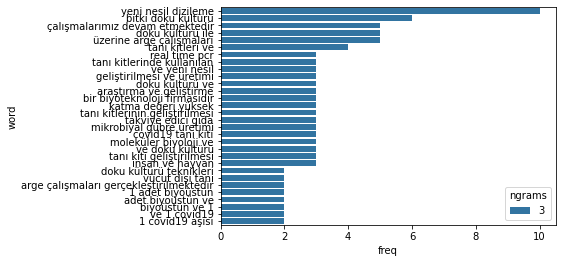

In [171]:
lst_tokens = filtered_punctuation
ngrams = [3]
    
## calculate
dtf_freq = pd.DataFrame()
for n in ngrams:
   dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
   dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns= ["word","freq"])
   dtf_n["ngrams"] = n
   dtf_freq = dtf_freq.append(dtf_n)
   dtf_freq["word"] = dtf_freq["word"].apply(lambda x: " ".join(string for string in x) )
   #dtf_freq_X= dtf_freq.sort_values(["ngrams","freq"], ascending= [True,False])
    
## plot
sns.barplot(x="freq", y="word", hue="ngrams", dodge=False,
 data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(30))
plt.show()

# Remove stop words

Stop words are basically a set of commonly used words in any language. The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead. 

In English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words. Stop words are generally thought to be a “single set of words”. It really can mean different things to different applications. I used minimal stop words list:
- Determiners (the, a, an, another)
- Coordinating conjunctions (for, an, nor, but, or, yet, so)
- Prepositions (in, under, towards, before)

## Load stop words

As a stop words list, I took a Turkish list that I found on the internet (https://github.com/ahmetaa/zemberek-nlp/blob/master/experiment/src/main/resources/stop-words.tr.txt) as a starting point and made additions to it from the words in my text.

In [109]:
# import stop words
SW1= pd.read_csv (r'C:\Users\bilal\Biyoteknoloji\StopWords.txt', header=None)
SW1.head()

,0
0,a
1,aa
2,aaa
3,aaah
4,aah


## Convert stop words to a list 

In [111]:
# Convert to list
SW = SW1.iloc[:, 0].tolist()
SW[0:5]

['a', 'aa', 'aaa', 'aaah', 'aah']

## Remove stop words

In [112]:
# Remove stop words
filtered_sentence = []
  
for w in filtered_punctuation:
    if w not in SW:
        filtered_sentence.append(w)
filtered_sentence[0:5]

['dna', 'markörleri', 'primer', 'tasarım', 'genomik']

# Lemmatization

In [113]:
# not worked well
from snowballstemmer import TurkishStemmer
turkStem = TurkishStemmer()
data_words_nostops = [turkStem.stemWord(word) for word in filtered_sentence]
data_words_nostops[0:10]

['dna',
 'markör',
 'primer',
 'tasar',
 'genomik',
 'düzey',
 'filogenetik',
 'analiz',
 'molekü',
 'markör']

## Value counts

In [27]:
freq=pd.value_counts(np.array(data_words_nostops))
freq.head(10)

üret             151
kit              103
arge              80
faaliyet          75
geliştirilmes     72
ta                67
analiz            64
bitki             64
çalışma           63
teknik            59
dtype: int64

In [28]:
df_freq = pd.DataFrame(freq, columns = ['WordFreq'])
df_freq.head()

,WordFreq
üret,151
kit,103
arge,80
faaliyet,75
geliştirilmes,72


In [29]:
#df_freq.to_excel("output.xlsx")  

# Again collocations after elimination of stop words 

## bigram

In [121]:
# change this to read in your data
finder_2grams = BigramCollocationFinder.from_words(filtered_sentence)
# only bigrams that appear 7+ times
finder_2grams.apply_freq_filter(7)
finder_2grams.nbest(bigram_measures.pmi, 10)

[('nesil', 'dizileme'),
 ('moleküler', 'biyoloji'),
 ('doku', 'kültürü'),
 ('test', 'kiti'),
 ('hücre', 'kültürü'),
 ('tarımsal', 'biyoteknoloji'),
 ('tanı', 'kiti'),
 ('tanı', 'kitleri'),
 ('arge', 'faaliyetleri'),
 ('bitki', 'doku')]

<div class="alert alert-block alert-info">
<b>In English:</b>
    
[('generation', 'sequence'),
    
  ('molecular Biology'),
    
  ('tissue', 'culture'),
    
  ('test', 'kit'),
    
  ('cell culture'),
    
  ('agricultural', 'biotechnology'),
    
  ('diagnosis', 'kit'),
    
  ('diagnosis', 'kits'),
    
  ('r&d', 'activities'),
    
  ('plant', 'tissue')]
    
</div>

## trigram

In [123]:
# A similar interface is provided for trigrams:
finder_3grams = TrigramCollocationFinder.from_words(filtered_sentence)

# only bigrams that appear 3+ times
finder_3grams.apply_freq_filter(3)

# return the 10 n-grams with the highest PMI
finder_3grams.nbest(trigram_measures.pmi, 10)

[('real', 'time', 'pcr'),
 ('takviye', 'edici', 'gıda'),
 ('katma', 'değeri', 'yüksek'),
 ('tanı', 'kitlerinde', 'kullanılan'),
 ('mikrobiyal', 'gübre', 'üretimi'),
 ('tanı', 'kitlerinin', 'geliştirilmesi'),
 ('covid19', 'tanı', 'kiti'),
 ('bitki', 'doku', 'kültürü'),
 ('tanı', 'kiti', 'geliştirilmesi')]

<div class="alert alert-block alert-info">
<b>In English:</b>
    
[('real', 'time', 'pcr'),
    
  ('supplement', 'reinforcing', 'food'),
    
  ('added', 'value', 'high'),
    
  ('diagnosis', 'kits', 'used'),
    
  ('microbial', 'fertilizer', 'production'),
    
  ('diagnosis', 'kits', 'development'),
    
  ('covid19', 'diagnosis', 'kit'),
    
  ('plant', 'tissue', 'culture'),
    
  ('diagnosis', 'kit', 'development')]
    
</div>

## fourgram

In [32]:
# 4grams
finder_4grams = QuadgramCollocationFinder.from_words(filtered_sentence)

# only bigrams that appear 2+ times
finder_4grams.apply_freq_filter(2)

# return the 10 n-grams with the highest PMI
finder_4grams.nbest(fourgram_measures.pmi, 10)

[('faz1', 'devamında', "kore'den", 'lisanslanmıştır'),
 ('gx-g3', 'faz1', 'devamında', "kore'den"),
 ('çukurlar', 'açılarak', 'cnc', 'tezgahlarında'),
 ('cihazlar', 'özellikli', 'glp', 'analizlerdir'),
 ('devamında', "kore'den", 'lisanslanmıştır', 'bununla'),
 ('dışa', 'döviz', 'kuruna', 'bağımlı'),
 ('ilerlemektedir', 'dışa', 'döviz', 'kuruna'),
 ('tüseb', 'mali', 'desteği', 'şartlı'),
 ('hazırlık', 'tamamlanmış', 'tüseb', 'mali'),
 ('küresel', 'çukurlar', 'açılarak', 'cnc')]

# Again word count data viz after elimination of stop words 

## 1-word

In [137]:
MC_SW=pd.DataFrame(nltk.FreqDist(nltk.ngrams(filtered_sentence, 1)).most_common(), columns= ["word","freq"])
MC_SW.head(10)

,word,freq
0,"(üretimi,)",95
1,"(arge,)",80
2,"(geliştirilmesi,)",70
3,"(tanı,)",67
4,"(doku,)",49
5,"(biyoteknoloji,)",49
6,"(dna,)",45
7,"(bitki,)",45
8,"(kültürü,)",45
9,"(üretim,)",45


<div class="alert alert-block alert-info">
<b>In English:</b>
    
(production,) 95
    
(r&d) 80
    
(development,) 70
    
(diagnosis) 67
    
(tissue) 49
    
(biotechnology,) 49
    
(dna) 45
    
(plant,) 45
    
(culture,) 45
    
(production,) 45
    
</div>

## 2-word

In [138]:
MC_SW=pd.DataFrame(nltk.FreqDist(nltk.ngrams(filtered_sentence, 2)).most_common(), columns= ["word","freq"])
MC_SW[MC_SW['freq']>6]

,word,freq
0,"(doku, kültürü)",24
1,"(tanı, kiti)",16
2,"(hücre, kültürü)",14
3,"(tanı, kitleri)",14
4,"(moleküler, biyoloji)",10
5,"(nesil, dizileme)",10
6,"(tarımsal, biyoteknoloji)",9
7,"(test, kiti)",8
8,"(arge, faaliyetleri)",8
9,"(genetik, tanı)",7


<div class="alert alert-block alert-info">
<b>In English:</b>
    
(tissue, culture) 24

(diagnosis kit) 16

(cell, culture) 14

(diagnosis, kits) 14

(molecular, biology) 10

(generation, sequencing) 10

(agricultural, biotechnology) 9

(test, kit) 8

(R&D, activities) 8

(genetics, diagnosis) 7

(plant, tissue) 7
    
</div>

## 3-word

In [144]:
MC_SW=pd.DataFrame(nltk.FreqDist(nltk.ngrams(filtered_sentence, 3)).most_common(), columns= ["word","freq"])
MC_SW[MC_SW['freq']>3]

,word,freq
0,"(bitki, doku, kültürü)",6


<div class="alert alert-block alert-info">
<b>In English:</b>
    
(plant, tissue, culture) 6

</div>

## Most common words viz after elimination of stop words

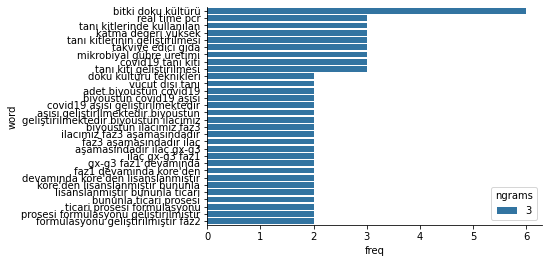

In [165]:
lst_tokens = filtered_sentence
ngrams = [3]
    
## calculate
dtf_freq = pd.DataFrame()
for n in ngrams:
   dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
   dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns= ["word","freq"])
   dtf_n["ngrams"] = n
   dtf_freq = dtf_freq.append(dtf_n)
   dtf_freq["word"] = dtf_freq["word"].apply(lambda x: " ".join(string for string in x) )
   #dtf_freq_X= dtf_freq.sort_values(["ngrams","freq"], ascending= [True,False])
    
## plot
sns.barplot(x="freq", y="word", hue="ngrams", dodge=False,
 data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(30))
sns.despine()
plt.show()

# 4.Top2vec

Top2Vec is an algorithm for topic modeling and semantic search. It automatically detects topics present in text and generates jointly embedded topic, document and word vectors. Once you train the Top2Vec model you can:

- Get number of detected topics.
- Get topics.
- Get topic sizes.
- Get hierarchichal topics.
- Search topics by keywords.
- Search documents by topic.
- Search documents by keywords.
- Find similar words.

**Benefits**
- Automatically finds number of topics.
- No stop word lists required.
- No need for stemming/lemmatization.
- Works on short text.
- Creates jointly embedded topic, document, and word vectors.
- Has search functions built in.

In [152]:
# pip install Top2vec
# pip install top2vec[sentence_encoders] --- cmd'den yaptım
from top2vec import Top2Vec
# top2vec'i import edemezse cmd'den aşağıdaki kodu çalıştır.
# conda install -c conda-forge hdbscan

In [160]:
model = Top2Vec(liste, embedding_model='distiluse-base-multilingual-cased',speed='learn', workers = 2,min_count=5)
#model = Top2Vec(filtered_punctuation, embedding_model='distiluse-base-multilingual-cased',speed='learn', workers = 2,min_count=5)
#model = Top2Vec(filtered_sentence, embedding_model='distiluse-base-multilingual-cased',speed='learn', workers = 2,min_count=5)
#model = Top2Vec(data_words_nostops, embedding_model='distiluse-base-multilingual-cased',speed='learn', workers = 2,min_count=5)

2022-09-04 08:28:50,908 - top2vec - INFO - Pre-processing documents for training
2022-09-04 08:28:50,988 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
2022-09-04 08:28:55,141 - top2vec - INFO - Creating joint document/word embedding
2022-09-04 08:29:27,500 - top2vec - INFO - Creating lower dimension embedding of documents
2022-09-04 08:29:30,925 - top2vec - INFO - Finding dense areas of documents
2022-09-04 08:29:30,949 - top2vec - INFO - Finding topics


In [154]:
model.get_num_topics()

4

In [155]:
model.topic_words

array([['biyoteknolojisi', 'biyoteknolojik', 'biyoteknoloji',
        'biyoinformatik', 'biyoloji', 'biyolojik', 'mikrobiyoloji',
        'mikroorganizma', 'yurutmekteyiz', 'organik', 'girisimimiz',
        'bakterilerin', 'bakteriyel', 'mikrobiyal', 'biyo', 'genetik',
        'bakteri', 'yapmaktayız', 'genomik', 'molekuler',
        'teknolojileri', 'teknolojisi', 'calısmalarımız', 'hayvanlarda',
        'enzim', 'firmamız', 'sirketimiz', 'laboratuvar', 'protein',
        'implant', 'faaliyetlerimiz', 'biyosensor', 'malzeme',
        'teknikleri', 'gelistirme', 'tarımsal', 'teknik', 'analizleri',
        'teknikler', 'gen', 'vitro', 'bulunmaktadır', 'bitkilerden',
        'probiyotik', 'hayvan', 'patent', 'analizi', 'tarım',
        'yapılmaktadır', 'yapmaktadır'],
       ['biyoteknolojisi', 'biyoteknolojik', 'biyoteknoloji',
        'biyoinformatik', 'biyolojik', 'biyoloji', 'organik',
        'mikroorganizma', 'mikrobiyoloji', 'teknolojisi',
        'teknolojileri', 'biyo', 'enzim',

# to be able to visualize a specific topic
model.generate_topic_wordcloud(1)

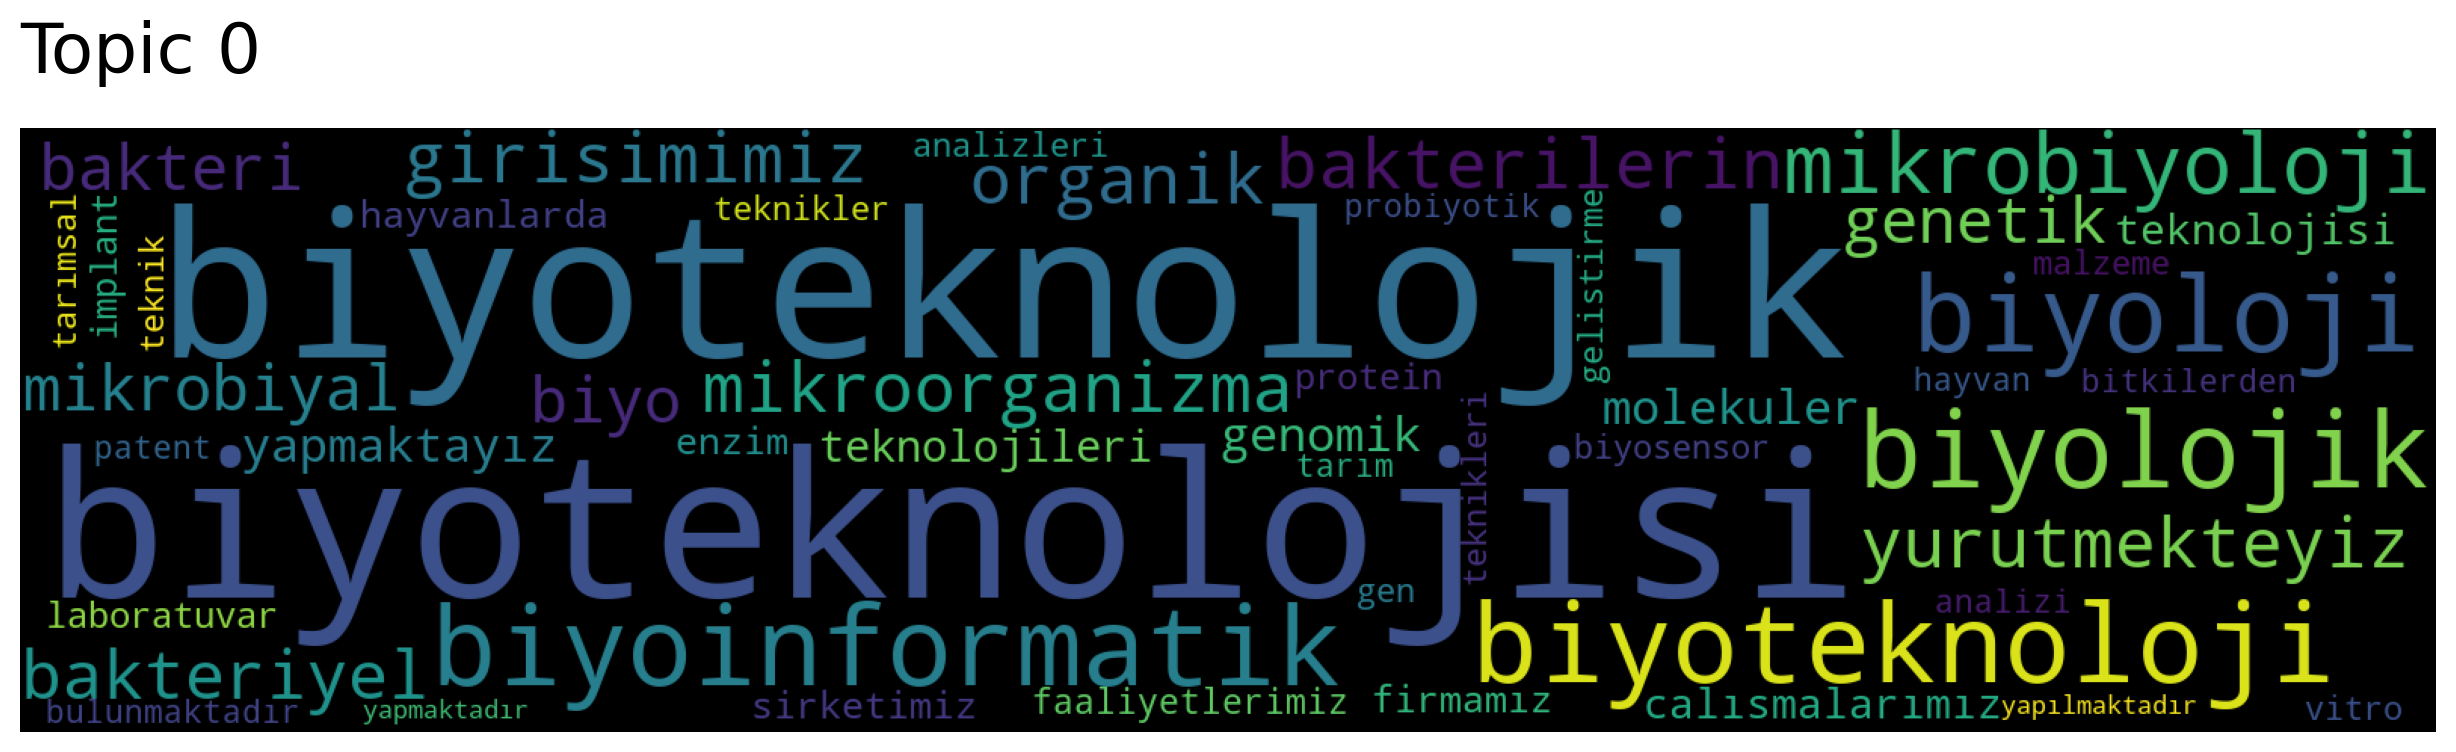

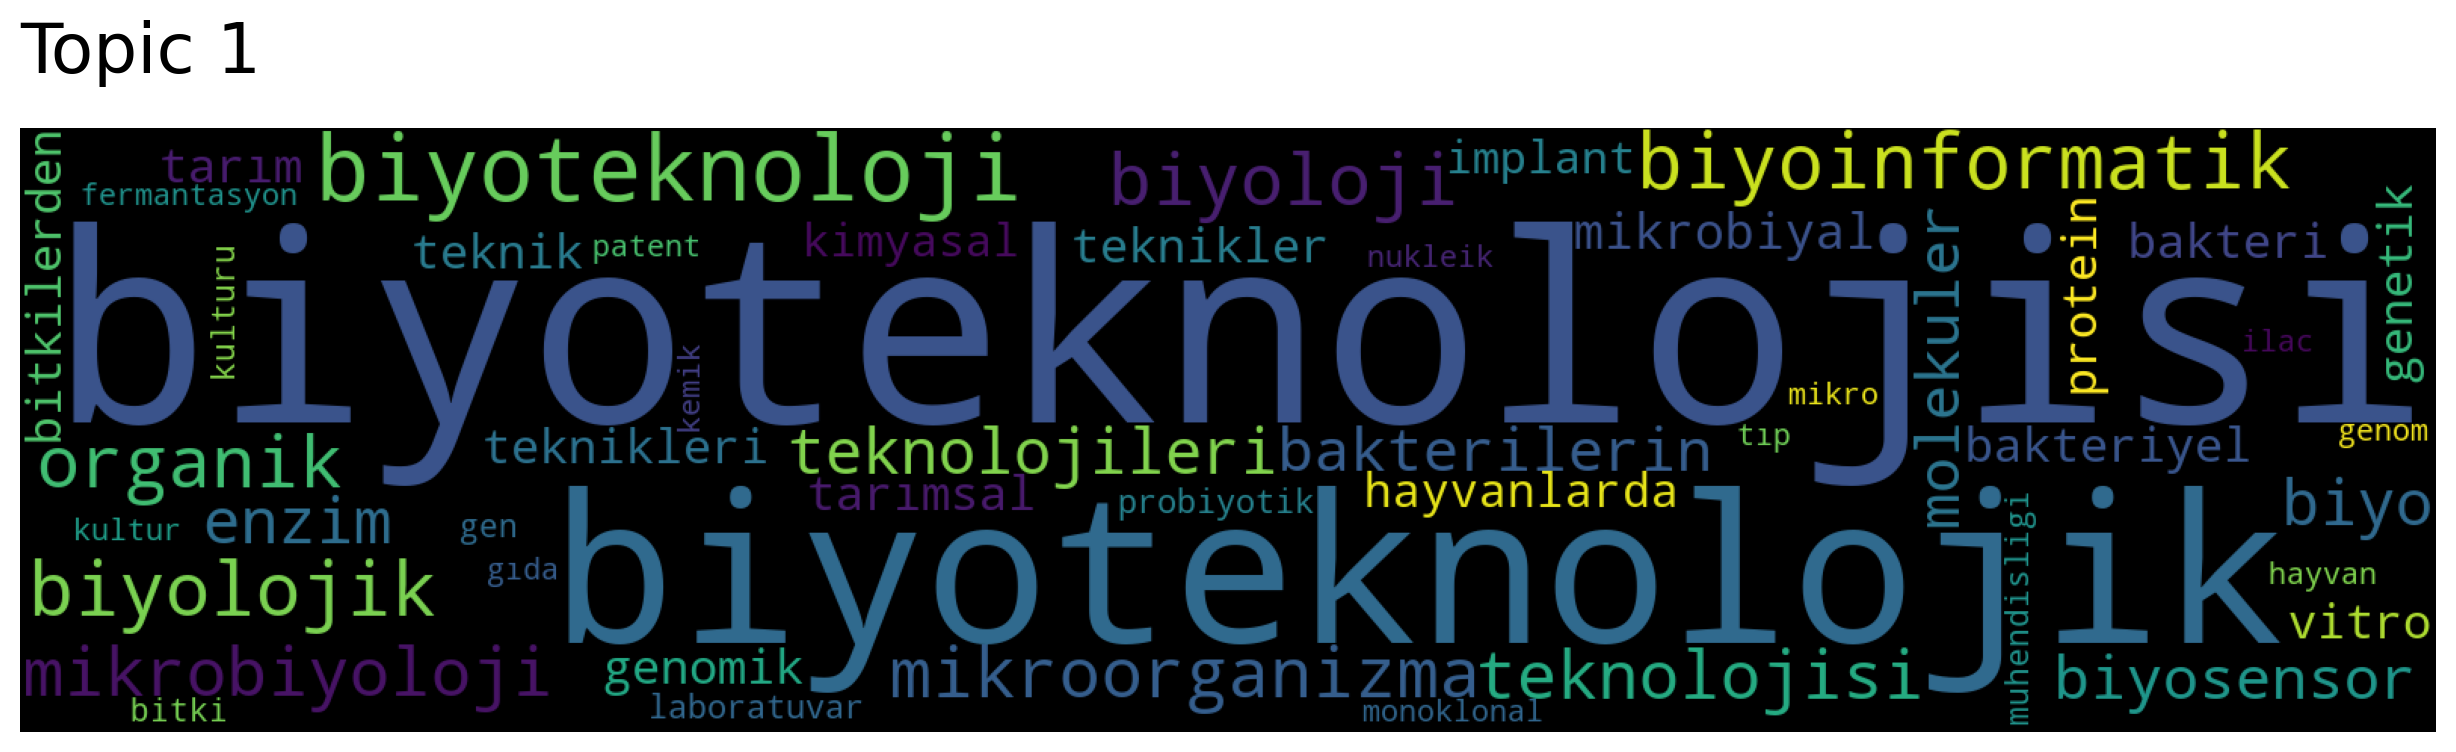

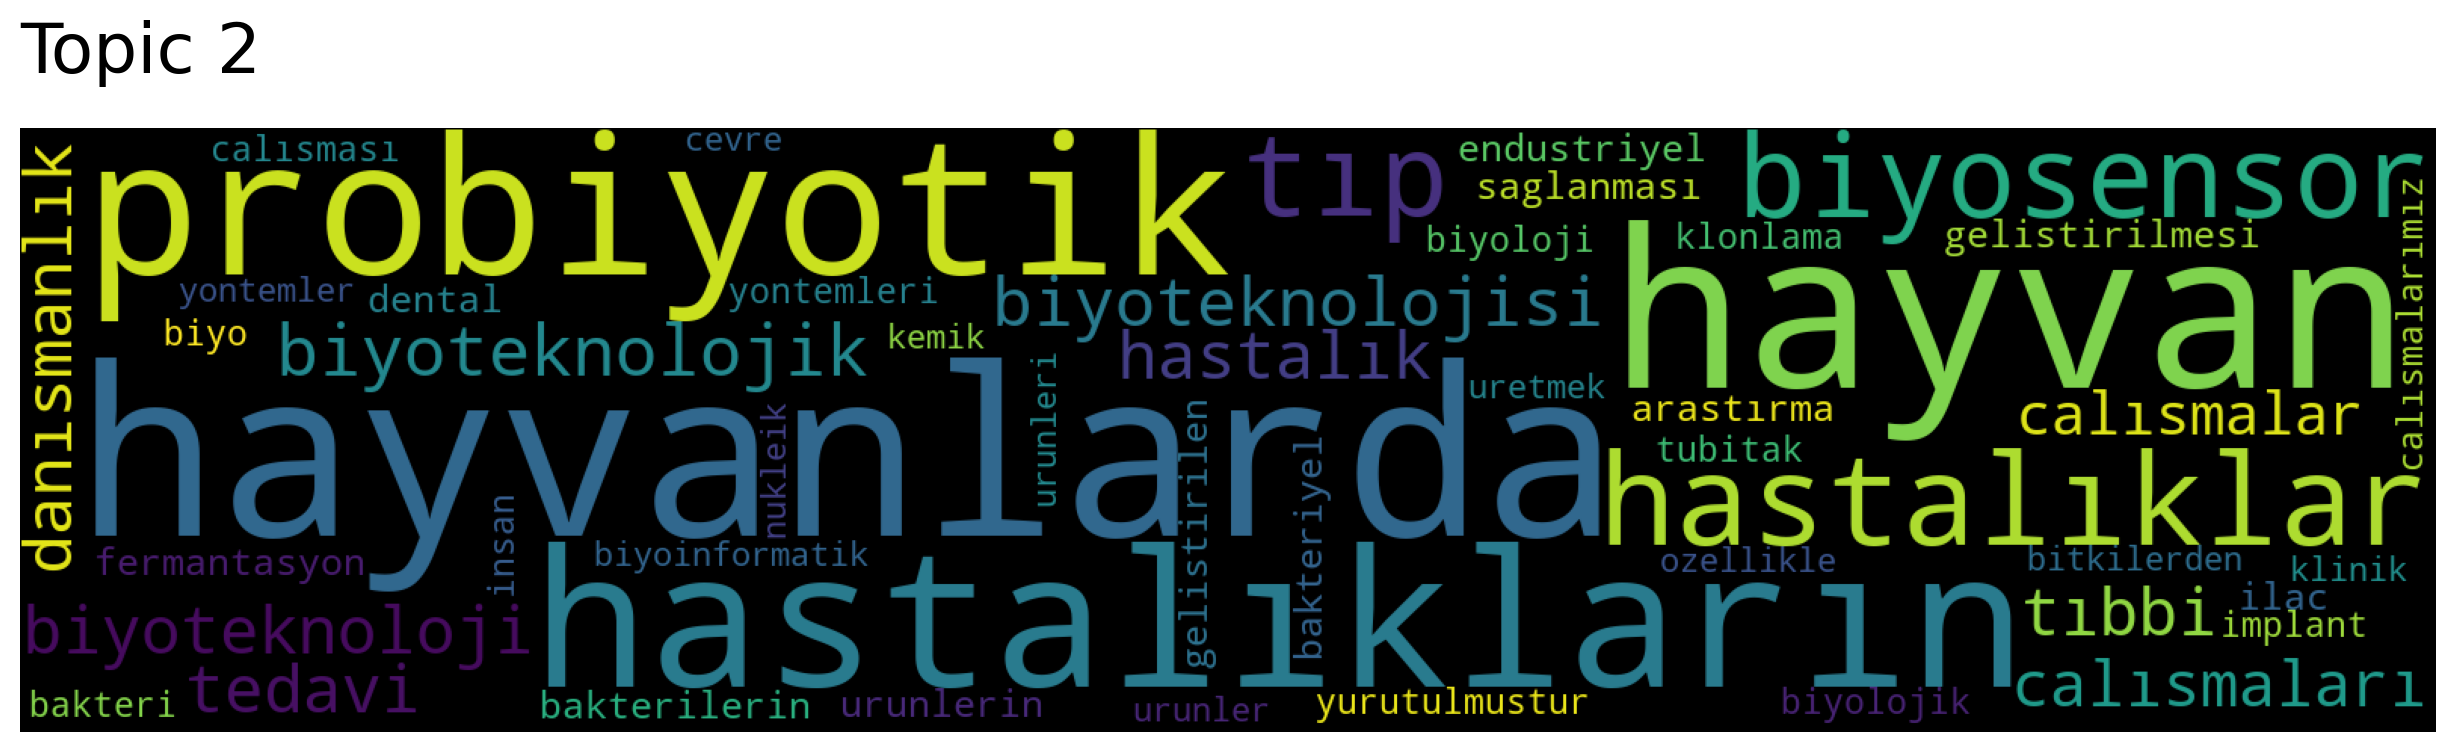

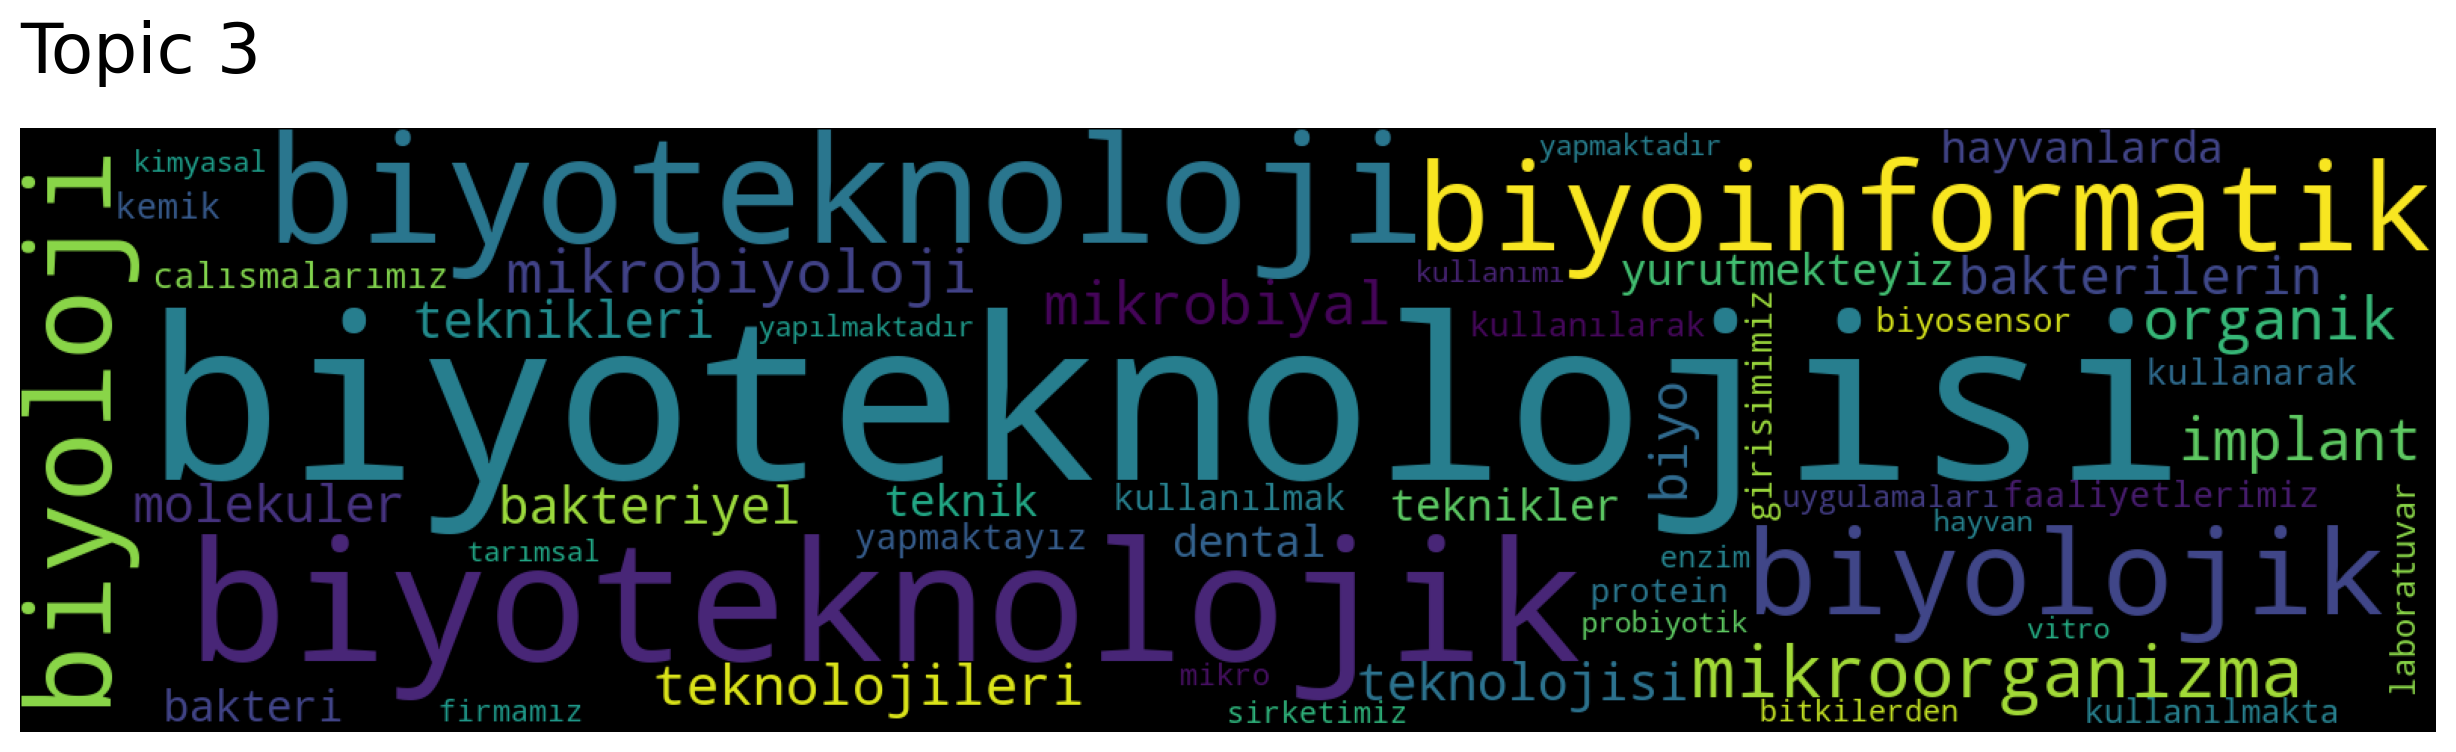

In [156]:
# to be able to visualize all the topics
for i in range(4):
    model.generate_topic_wordcloud(i)
    